In [52]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px

<h1>Create Dataframe</h1>

In [104]:
URL = "https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/hepatitis.csv"
df = pd.read_csv(URL)

In [105]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


<h1>Data Preprocessing</h1>

In [106]:
#Search for NaN values
df.isna().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           9
LIVER FIRM         10
SPLEEN PALPABLE     4
SPIDERS             4
ASCITES             4
VARICES             4
BILIRUBIN           5
ALK PHOSPHATE      28
SGOT                3
ALBUMIN            15
PROTIME            66
HISTOLOGY           0
dtype: int64

In [107]:
df.nunique()

Class               2
AGE                49
SEX                 2
STEROID             2
ANTIVIRALS          2
FATIGUE             2
MALAISE             2
ANOREXIA            2
LIVER BIG           2
LIVER FIRM          2
SPLEEN PALPABLE     2
SPIDERS             2
ASCITES             2
VARICES             2
BILIRUBIN          34
ALK PHOSPHATE      83
SGOT               84
ALBUMIN            29
PROTIME            44
HISTOLOGY           2
dtype: int64

In [108]:
#Columns with non categorical values - 
# AGE                49
# BILIRUBIN          34
# ALK PHOSPHATE      83
# SGOT               84
# ALBUMIN            29
# PROTIME            44

In [109]:
df.dtypes

Class                int64
AGE                  int64
SEX                  int64
STEROID            float64
ANTIVIRALS           int64
FATIGUE              int64
MALAISE              int64
ANOREXIA             int64
LIVER BIG          float64
LIVER FIRM         float64
SPLEEN PALPABLE    float64
SPIDERS            float64
ASCITES            float64
VARICES            float64
BILIRUBIN          float64
ALK PHOSPHATE      float64
SGOT               float64
ALBUMIN            float64
PROTIME            float64
HISTOLOGY            int64
dtype: object

In [110]:
# Separating name of columns with categorical and null values

#Handling null values

for col_name in df.columns:
    if df[col_name].nunique() > 2 and df[col_name].isna().sum() > 0:
        df[col_name].fillna(df[col_name].mean(),inplace = True)

    elif df[col_name].nunique() == 2 and df[col_name].isna().sum() > 0:
        df[col_name].fillna(df[col_name].mode().iloc[0], inplace = True)
        

In [111]:
df.isna().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

In [112]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,61.852273,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,61.852273,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,61.852273,1
3,0,31,1,2.0,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,80.000000,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,105.325397,200.0,4.0,61.852273,1


In [113]:
df.isna().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

In [114]:
#Scaling

In [115]:
df.nunique()

Class               2
AGE                49
SEX                 2
STEROID             2
ANTIVIRALS          2
FATIGUE             2
MALAISE             2
ANOREXIA            2
LIVER BIG           2
LIVER FIRM          2
SPLEEN PALPABLE     2
SPIDERS             2
ASCITES             2
VARICES             2
BILIRUBIN          35
ALK PHOSPHATE      84
SGOT               85
ALBUMIN            30
PROTIME            45
HISTOLOGY           2
dtype: int64

In [116]:
df.head(5)

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,61.852273,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,61.852273,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,61.852273,1
3,0,31,1,2.0,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,80.000000,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,105.325397,200.0,4.0,61.852273,1


In [117]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
scaler = MinMaxScaler()

In [119]:
for col_name in df.columns:
    if df[col_name].nunique() > 2:
        df[col_name] = scaler.fit_transform(df[[col_name]])

In [120]:
df.head(5)

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,0.323944,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.090909,0.219331,0.006309,0.441860,0.618523,1
1,0,0.605634,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.077922,0.405204,0.044164,0.325581,0.618523,1
2,0,1.000000,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.051948,0.260223,0.028391,0.441860,0.618523,1
3,0,0.338028,1,2.0,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.051948,0.074349,0.059937,0.441860,0.800000,1
4,0,0.380282,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.090909,0.294890,0.293375,0.441860,0.618523,1


In [121]:
#Visualizations

<Axes: xlabel='SEX', ylabel='count'>

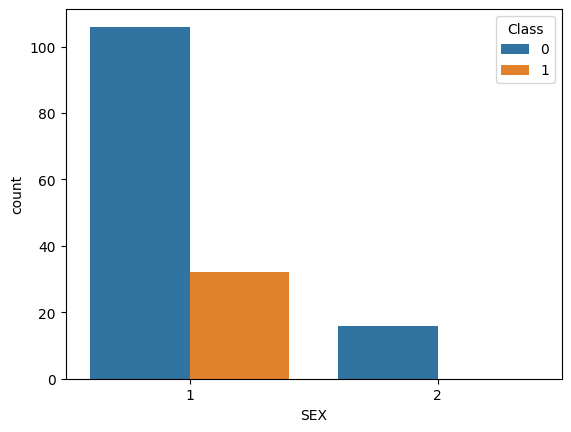

In [122]:
sn.countplot(x="SEX",data=df,hue="Class")

<Axes: xlabel='ANTIVIRALS', ylabel='count'>

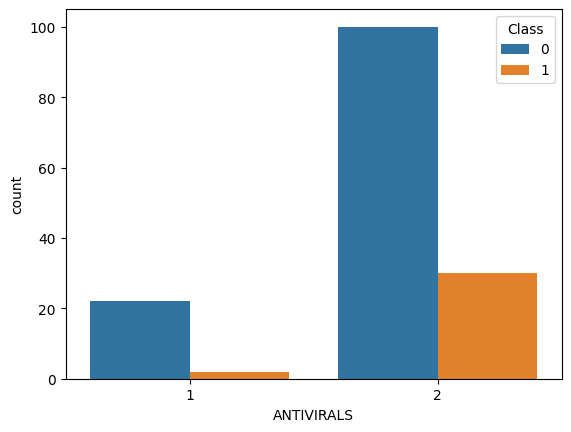

In [123]:
sn.countplot(x="ANTIVIRALS",data=df,hue="Class")

<Axes: xlabel='FATIGUE', ylabel='count'>

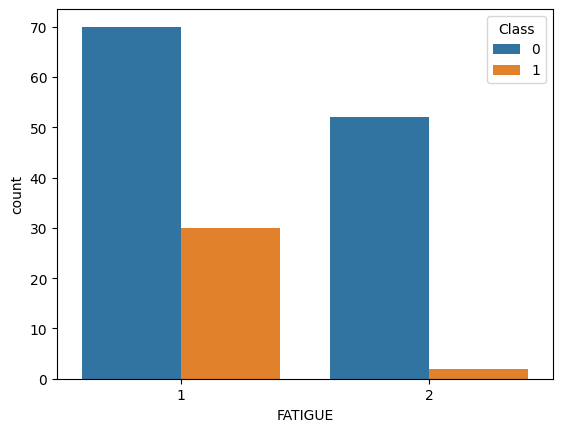

In [124]:
sn.countplot(x="FATIGUE",data=df,hue="Class")

<Axes: xlabel='MALAISE', ylabel='count'>

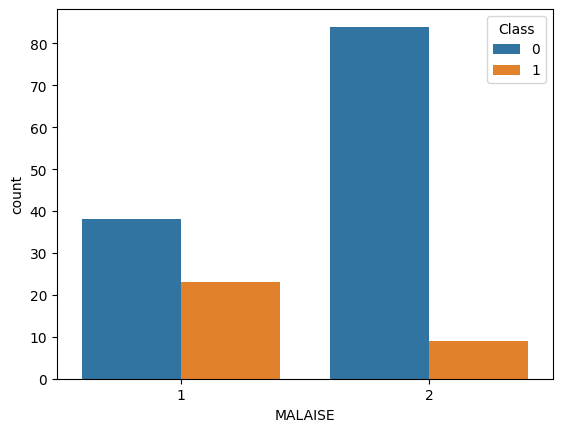

In [125]:
sn.countplot(x="MALAISE",data=df,hue="Class")

<Axes: xlabel='ANOREXIA', ylabel='count'>

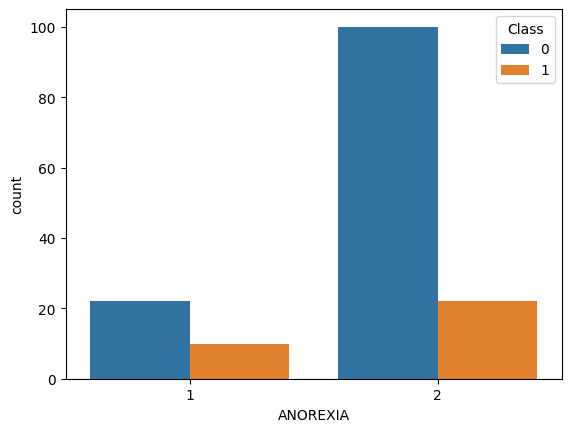

In [126]:
sn.countplot(x="ANOREXIA",data=df,hue="Class")

In [127]:
#Spliting

In [128]:
X = df.drop(["Class"],axis = 1)
y = df["Class"]

In [129]:
y

0      0
1      0
2      0
3      0
4      0
      ..
149    1
150    0
151    0
152    0
153    1
Name: Class, Length: 154, dtype: int64

In [130]:
#Train Test Split

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)

In [133]:
#Model Creation

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
dt = DecisionTreeClassifier()

In [136]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [137]:
from sklearn.tree import plot_tree

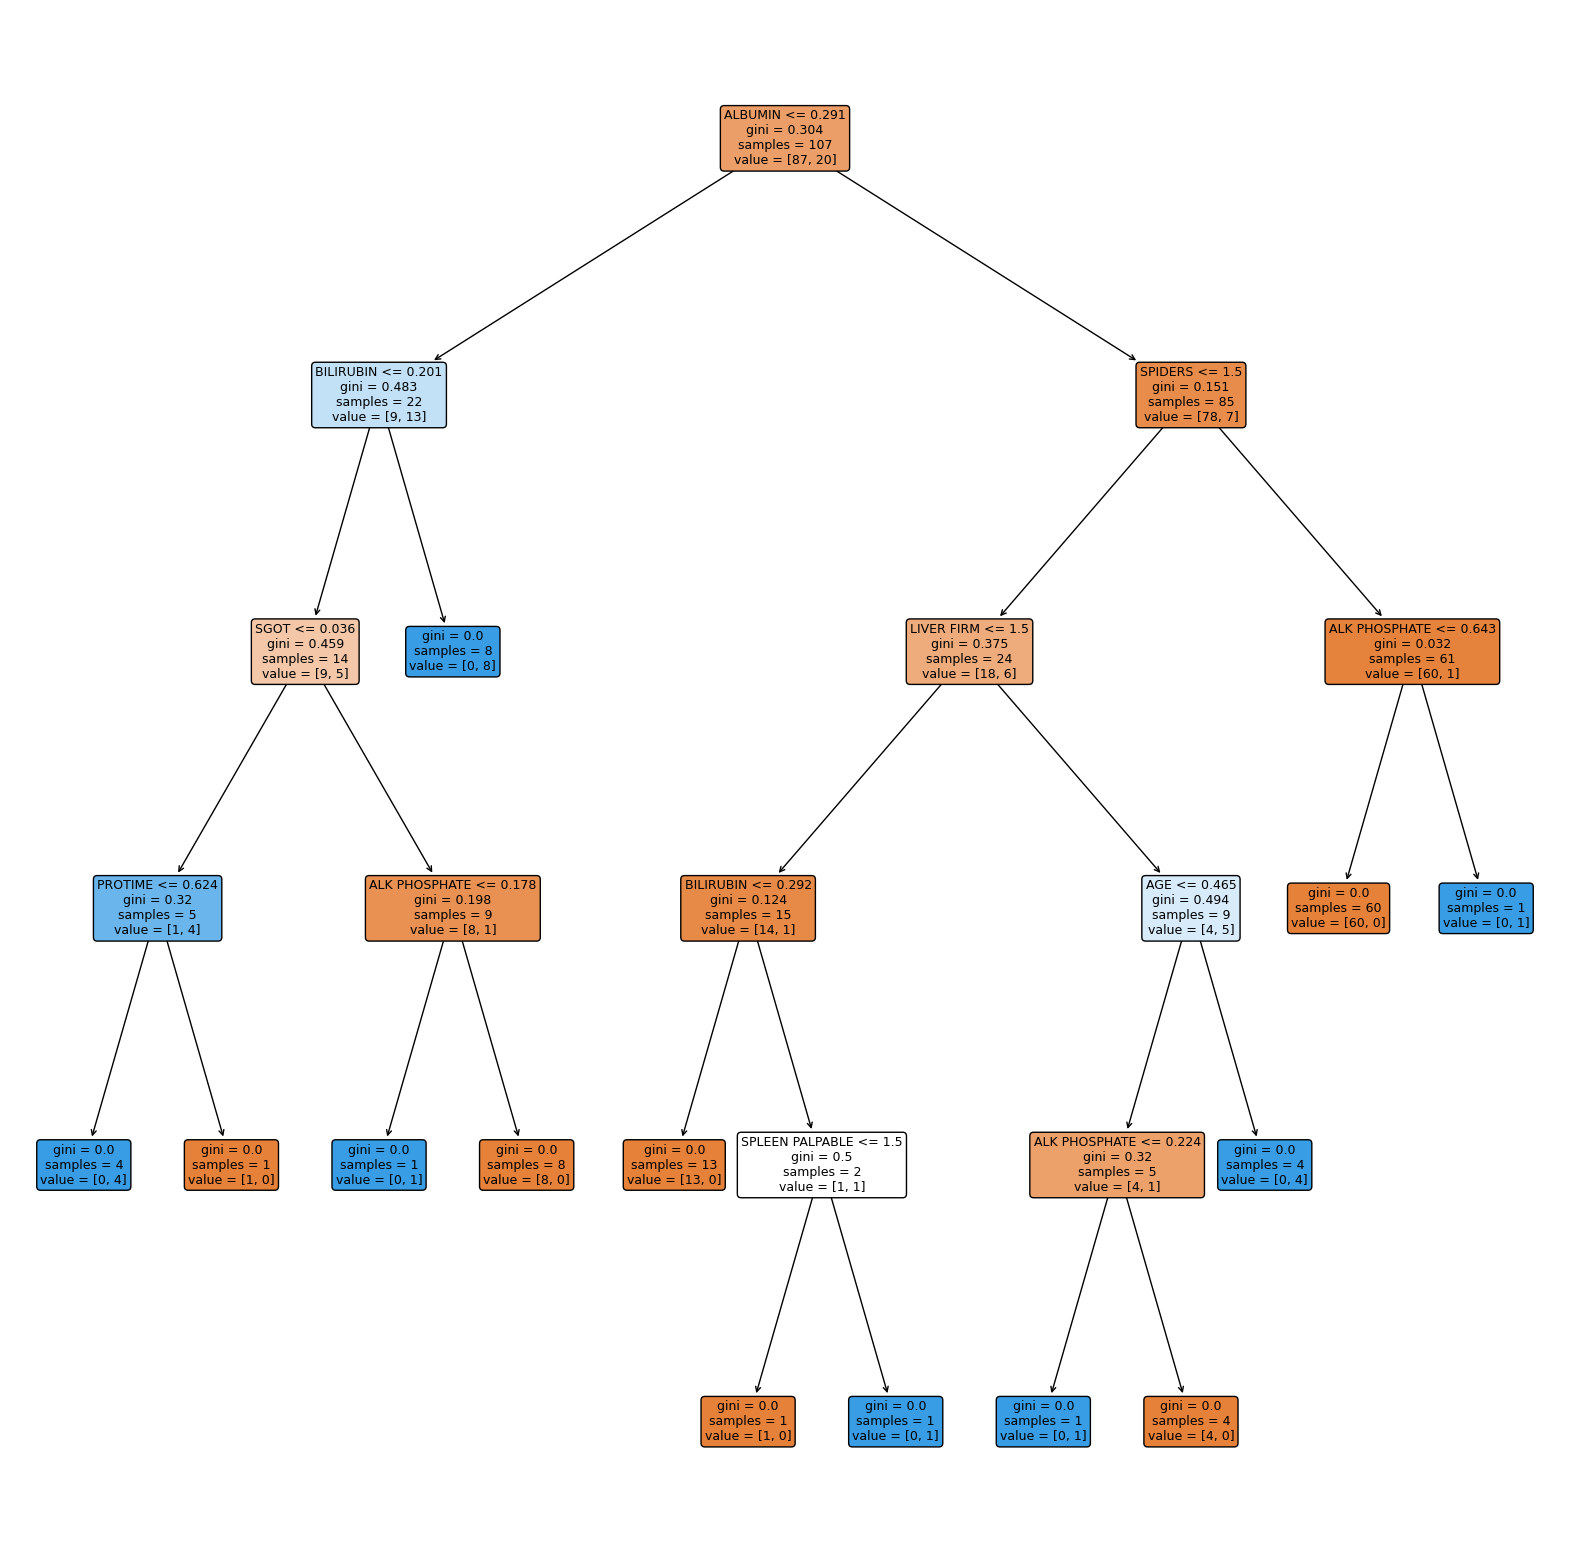

In [138]:
plt.figure(figsize = (20,20))
plot_tree(dt,filled = True, feature_names = X.columns, rounded = True, fontsize = 9)
plt.show()

<h1>Model Evaluation</h1>

In [139]:
#   - Make predictions on the testing set.
   # - Evaluate the model using the following metrics:
   #    - Confusion Matrix
   #    - Precision
   #    - Recall
   #    - F1 Score
   #    - AUC-ROC Score

In [140]:
#prediction
y_predicted = dt.predict(X_test)

In [141]:
import sklearn.metrics as mt

In [142]:
#Confusion Matrix
matrix = mt.confusion_matrix(y_test,y_predicted)

<Axes: >

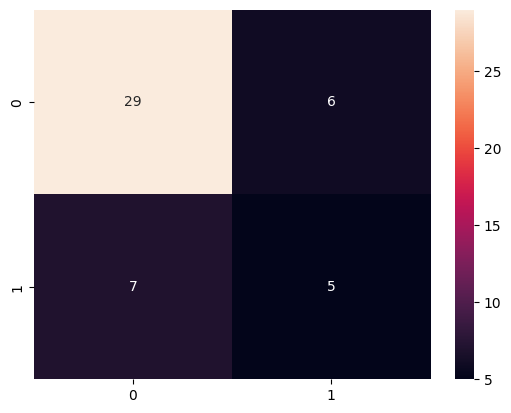

In [143]:
sn.heatmap(matrix,annot = True)

In [144]:
#Precision
mt.precision_score(y_test,y_predicted)

0.45454545454545453

In [145]:
#Recall
mt.recall_score(y_test,y_predicted)

0.4166666666666667

In [146]:
#F1
mt.f1_score(y_test,y_predicted)

0.43478260869565216

In [147]:
#ROC_AUC
mt.roc_auc_score(y_test,y_predicted)


0.6226190476190476

In [148]:
#ROC Curve
mt.roc_curve(y_test,y_predicted)

(array([0.        , 0.17142857, 1.        ]),
 array([0.        , 0.41666667, 1.        ]),
 array([inf,  1.,  0.]))

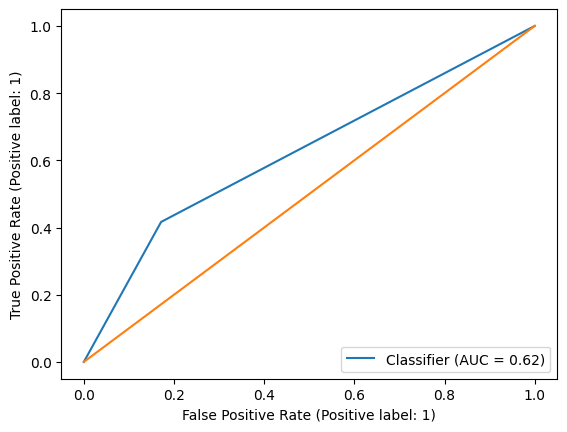

In [149]:
mt.RocCurveDisplay.from_predictions(y_test, y_predicted)
plt.plot([0,1],[0,1])

In [150]:
print(mt.classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.45      0.42      0.43        12

    accuracy                           0.72        47
   macro avg       0.63      0.62      0.63        47
weighted avg       0.72      0.72      0.72        47



In [152]:
#From the above classification report, 
# -We can observe that for class 0, the precision, recall, f1-score is 
#  above 80% which means the above ml model can predict 0 classes with high accuracy
# -We can observe that for class 1, the precision, recall, f1-score is 
#  somewhere close to 50% most of the time
#  which means the above ml model can predict 1 classes with very low accuracy
# -The ROC-Curve index is around 70% which is acceptable but has room for improvements
#-- The low prediction accuracy of class 1 probably because of the imbalance of 
#   no of 0s and 1s in the dataset as we can see from the support score.
#   The dataset contains 35 0s and only 12 1s. So the imbalance is pretty significant

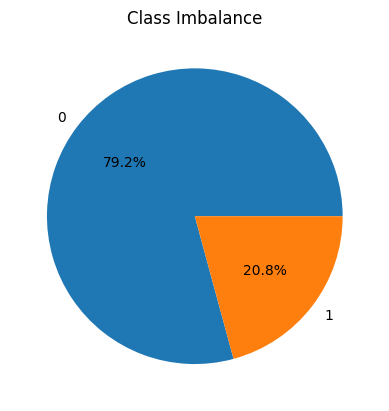

In [153]:
# Get pie chart slice labels
pie_chart_slice_labels = df['Class'].value_counts().index.to_numpy()

# Get pie chart slice values
pie_chart_slice_values = df['Class'].value_counts().to_numpy()

# Create a pie chart of the number of customers for each country origin
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("Class Imbalance")
plt.show()
